In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import networkx as nx
from pyciemss.visuals import plots, vega


In [3]:
g = nx.generators.barabasi_albert_graph(5, 3)

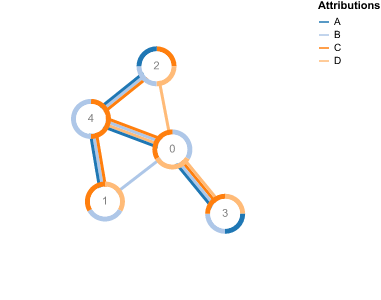

In [4]:
import random
def rand_attributions():
    possible = "ABCD"
    return random.sample(possible, random.randint(1, len(possible)))

def rand_label():
    possible = "TUVWXYZ"
    return random.randint(1, 10)
    return random.sample(possible, 1)[0]

node_properties = {n: {"attribution": rand_attributions(), 
                       "label": rand_label()}
                    for n in g.nodes()}

edge_attributions = {e: {"attribution": rand_attributions()} for e in g.edges()}

nx.set_node_attributes(g, node_properties)
nx.set_edge_attributes(g, edge_attributions)

schema = plots.attributed_graph(g)
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema)

In [13]:
g = nx.generators.barabasi_albert_graph(5, 3)
def rand_group():
    possible = "TUVWXYZ"
    return random.sample(possible, 1)[0]

node_properties = {n: {"group": rand_group(), 
                       "fx": random.randint(1, 100),
                       "fy": random.randint(1, 100)}
                    for n in g.nodes()}

edge_attributions = {e: {"group": rand_group()}
                    for e in g.edges()}

nx.set_node_attributes(g, node_properties)
nx.set_edge_attributes(g, edge_attributions)
nx.set_node_attributes(g, {k:f"n{i}" for i, k in enumerate(g.nodes)}, "label")

schema = plots.spring_force_graph(g, node_labels="label", input_layout = False)
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, format="interactive")